In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from models import MobileNet
from datasets import get_dataloaders
from utils import train, test
from pathlib import Path
from torch.utils.tensorboard import SummaryWriter

In [2]:
batch_size = 32
data_loaders, data_sizes = get_dataloaders(batch_size=batch_size, val_size=0.1)

In [3]:
data_loaders

{'train': <torch.utils.data.dataloader.DataLoader at 0x2a23fd2e5f0>,
 'val': <torch.utils.data.dataloader.DataLoader at 0x2a23fd2e350>,
 'test': <torch.utils.data.dataloader.DataLoader at 0x2a23fd2e1d0>}

In [4]:
data_sizes

{'train': 45000, 'val': 5000, 'test': 10000}

In [5]:
classes = ['airplane', 'automobile', 'bird', 'cat', 'deer',
           'dog', 'frog', 'horse', 'ship', 'truck']

In [6]:
def tensor_to_img(img, upsample=False):
    img = img / 2 + 0.5  # unnormalize
    return np.transpose(img, (1, 2, 0))  

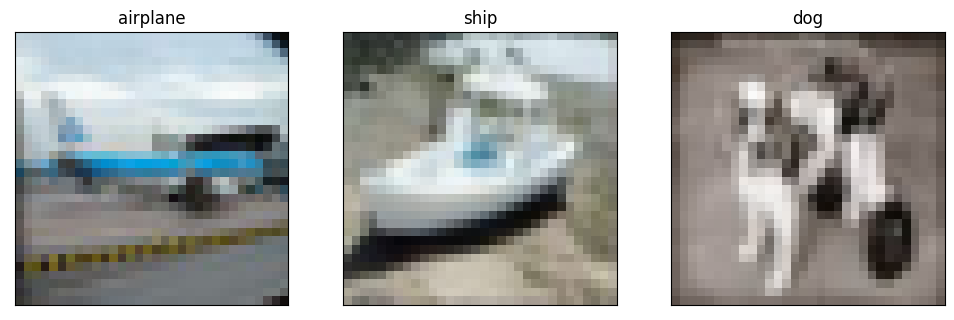

In [7]:
dataiter = iter(data_loaders["train"])
images, labels = dataiter.next()

fig = plt.figure(figsize=(12, 6))
for idx in np.arange(3):
    ax = fig.add_subplot(1, 3, idx+1, xticks=[], yticks=[])
    ax.imshow(tensor_to_img(images[idx]))
    ax.set_title(f"{classes[labels[idx]]}")

In [8]:
cuda = torch.cuda.is_available()

if cuda:
    print("CUDA is available...")
else:
    print("CUDA is not available!")

CUDA is available...


In [9]:
# instantiate model
model = MobileNet(classes=10, upsample_input=7)
if cuda:
    model.cuda()

lr = 1e-2
decay = 1e-5
optimizer = torch.optim.Adam(model.parameters(), lr=lr, weight_decay=decay)
criterion = torch.nn.CrossEntropyLoss()

In [10]:
# tensorboard logs
run = "run1"
writer =  SummaryWriter(f'logs/{run}')
model_path = f"./models/{run}/"
Path(model_path).mkdir(exist_ok=True)

In [11]:
initial_epochs = 0
n_epochs = 20

# train(model, data_loaders=data_loaders, data_sizes=data_sizes,
#         optimizer=optimizer, criterion=criterion, epochs=n_epochs,
#          model_path=model_path, writer=writer, initial_epochs=initial_epochs)

In [12]:
best_model = r"./models/run1/model.16-0.4926.pt"
model.load_state_dict(torch.load(best_model))

<All keys matched successfully>

In [13]:
test(model, data_loaders=data_loaders, writer=writer)

100%|████████████████████████████████████████████████████████████████████████████████| 313/313 [00:21<00:00, 14.87it/s]

Test Accuracy of airplane: 83.00%
Test Accuracy of automobile: 88.40%
Test Accuracy of bird: 76.70%
Test Accuracy of cat: 75.30%
Test Accuracy of deer: 77.90%
Test Accuracy of dog: 70.30%
Test Accuracy of frog: 84.60%
Test Accuracy of horse: 90.90%
Test Accuracy of ship: 94.30%
Test Accuracy of truck: 93.30%
Test Accuracy (Overall): 83.47%
